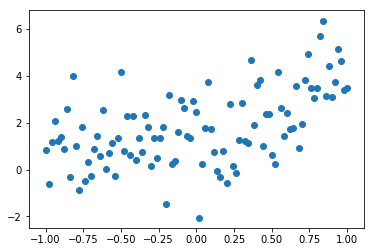

[1.3021486  0.9080633  1.2769957  0.862577   0.21787123]


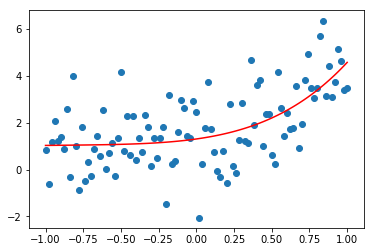

In [6]:
import tensorflow as tf                                                    
import numpy as np                                                         
import matplotlib.pyplot as plt                                            
%matplotlib qt
%matplotlib inline

learning_rate = 0.01                                                    
training_epochs = 40                                                       

trX = np.linspace(-1, 1, 101)                                              

num_coeffs = 5                                                             
trY_coeffs = [1,1,1,1,1]                                            
trY = 0                                                                    
for i in range(num_coeffs):                                             
    trY += trY_coeffs[i] * np.power(trX, i)                                

trY += np.random.randn(*trX.shape) * 1.5                                   

plt.scatter(trX, trY)                                                      
plt.show()                                                                 

X = tf.placeholder(tf.float32)                                          
Y = tf.placeholder(tf.float32)                                             

def model(X, w):                                                           
    terms = []                                                             
    for i in range(num_coeffs):                                            
        term = tf.multiply(w[i], tf.pow(X, i))                             
        terms.append(term)                                                 
    return tf.add_n(terms)                                              

w = tf.Variable([0.] * num_coeffs, name="parameters")                      
y_model = model(X, w)                                                      

cost = (tf.pow(Y-y_model, 2))                                              
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

sess = tf.Session()                                                        
init = tf.global_variables_initializer()                                   
sess.run(init)                                                             
                                                                           
for epoch in range(training_epochs):                                       
    for (x, y) in zip(trX, trY):                                           
        sess.run(train_op, feed_dict={X: x, Y: y})                         
                                                                           
w_val = sess.run(w)                                                        
print(w_val)                                                               

sess.close()                                                               

plt.scatter(trX, trY)                                                      
trY2 = 0                                                                   
for i in range(num_coeffs):                                                
    trY2 += w_val[i] * np.power(trX, i)                                    
                                                                           
plt.plot(trX, trY2, 'r')                                                   
plt.show() 